# **FNN Classifier on FMNIST Dataset**

## Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

## Loading Dataset

In [2]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to a range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to add a color channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

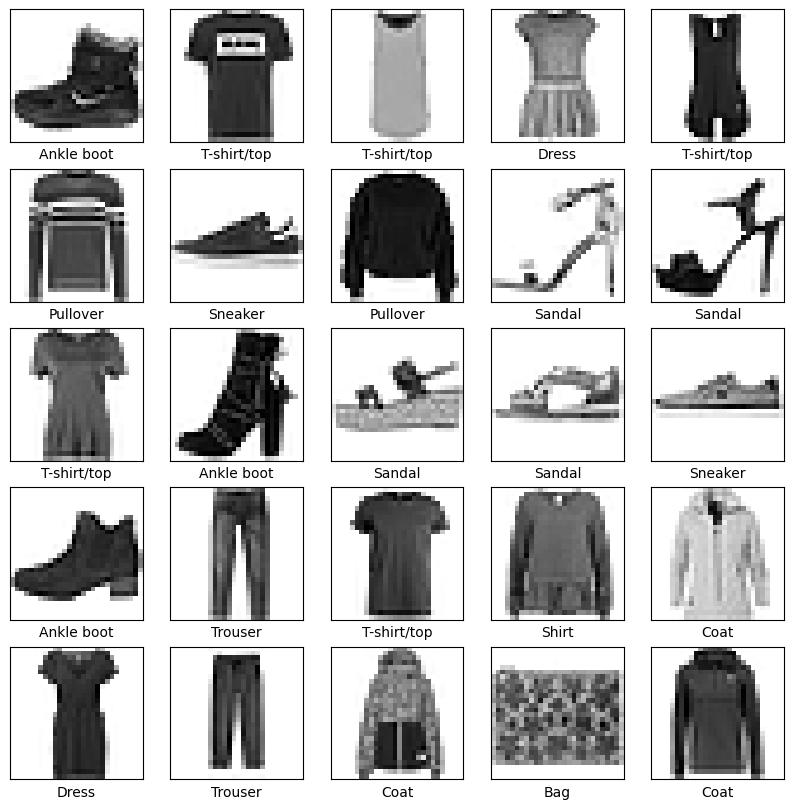

In [4]:
# Visualize a few samples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Defining the FNN Model

In [10]:
# Build the FCN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])



## Training the Model

In [14]:
# # Train the model
# model.fit(x_train, y_train, epochs=10, batch_size=64, 
#                     validation_data=(x_test, y_test))

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7769 - loss: 0.6404 - val_accuracy: 0.8476 - val_loss: 0.4176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8615 - loss: 0.3813 - val_accuracy: 0.8513 - val_loss: 0.4037
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8763 - loss: 0.3355 - val_accuracy: 0.8646 - val_loss: 0.3704
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8858 - loss: 0.3038 - val_accuracy: 0.8596 - val_loss: 0.3884
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8922 - loss: 0.2896 - val_accuracy: 0.8787 - val_loss: 0.3429
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8968 - loss: 0.2766 - val_accuracy: 0.8814 - val_loss: 0.3302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2694 - val_accuracy: 0.8787 - val_loss: 0.3352
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9054 - loss: 0.2491 - 

## Saving the model

In [15]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("fnn_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename
model.save_weights("fnn_model_weights.weights.h5")

print("Model weights saved to disk.")


# # To Load Model ::
# # Load the JSON file that contains the model architecture
# with open('fnn_model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()

# # Reconstruct the model from the JSON file
# loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# # Load the saved weights into the model
# loaded_model.load_weights("fnn_model_weights.h5")

# print("Model loaded from disk.")



Model weights saved to disk.


## Evaluating the Model Predictions

In [16]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 0s - 755us/step - accuracy: 0.8860 - loss: 0.3314
Test accuracy: 88.60%


#### Plot: Accuracy vs Epoch

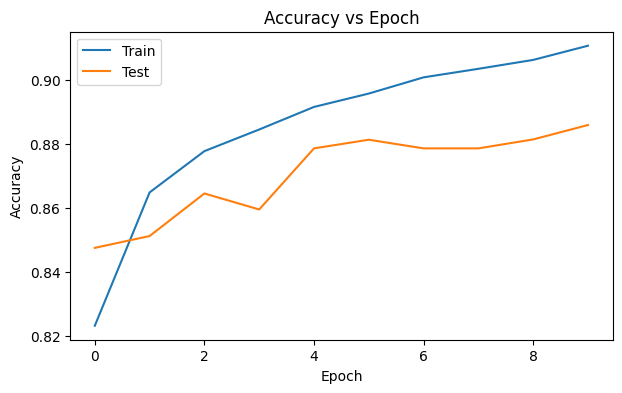

In [18]:
# Plot training & validation accuracy values
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_vs_epoch_FNN.png')

#### Plot: Loss vs Epoch

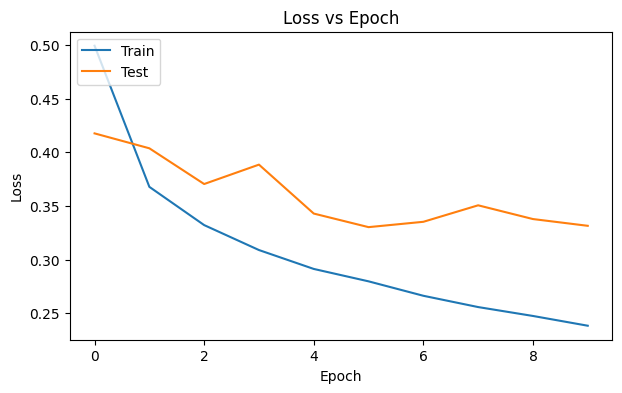

In [19]:
# Plot training & validation loss values
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('loss_vs_epoch_FNN.png')


plt.show()


### Visualising the Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


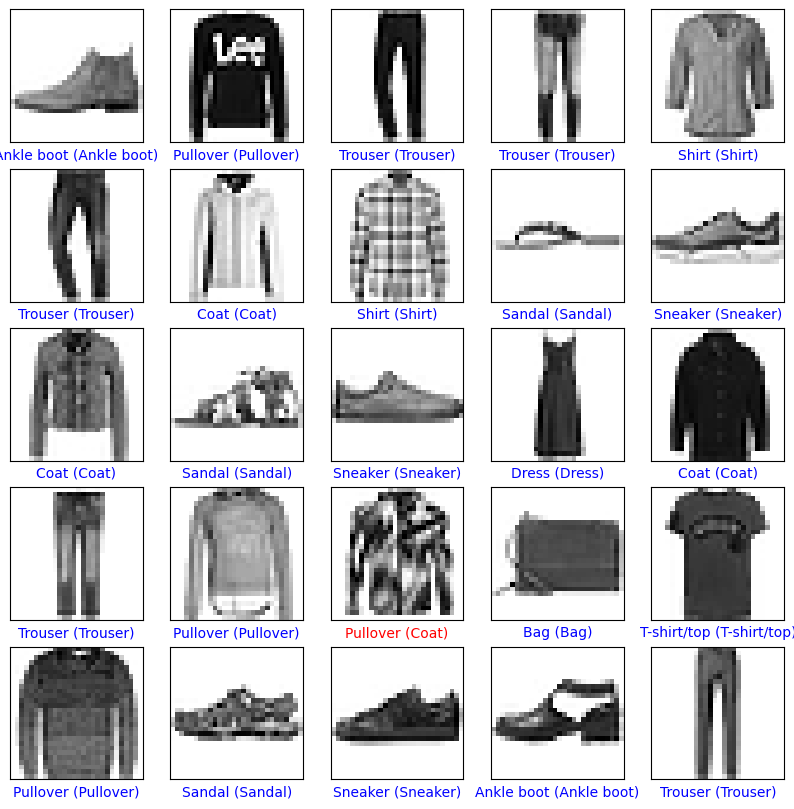

In [24]:
# Make predictions
predictions = model.predict(test_images)

# Display some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
    plt.savefig('Predictions_FNN.png')
plt.show()


### Tabulating Classification Report

In [25]:
# One-hot encode the labels
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Convert predictions to class labels
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_labels, axis=1)



In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()*100

# Calculate accuracy for each class
report_df['accuracy'] = report_df.apply(lambda row: row['support'] * row['recall'] / row['support'] 
    if row.name in class_names else np.nan, axis=1)

# Remove accuracy, macro avg, and weighted avg rows
report_df = report_df.loc[class_names]

# Select and reorder columns
report_df = report_df[['accuracy', 'precision', 'recall', 'f1-score']]


# Round the DataFrame to 2 decimal places
report_df = report_df.round(2)

Accuracy: 88.60


#### Display the Table

In [28]:
# Display the classification report in a box format
print(tabulate(report_df, headers='keys', tablefmt='grid'))

# Optionally, save the table to a CSV file
report_df.to_csv('classification_report_FNN.csv', index=True)


+-------------+------------+-------------+----------+------------+
|             |   accuracy |   precision |   recall |   f1-score |
+=============+============+=============+==========+============+
| T-shirt/top |       89.1 |       80.27 |     89.1 |      84.45 |
+-------------+------------+-------------+----------+------------+
| Trouser     |       97.8 |       97.7  |     97.8 |      97.75 |
+-------------+------------+-------------+----------+------------+
| Pullover    |       83.3 |       76.85 |     83.3 |      79.94 |
+-------------+------------+-------------+----------+------------+
| Dress       |       90.6 |       87.2  |     90.6 |      88.87 |
+-------------+------------+-------------+----------+------------+
| Coat        |       76.2 |       81.32 |     76.2 |      78.68 |
+-------------+------------+-------------+----------+------------+
| Sandal      |       96.2 |       98.16 |     96.2 |      97.17 |
+-------------+------------+-------------+----------+---------

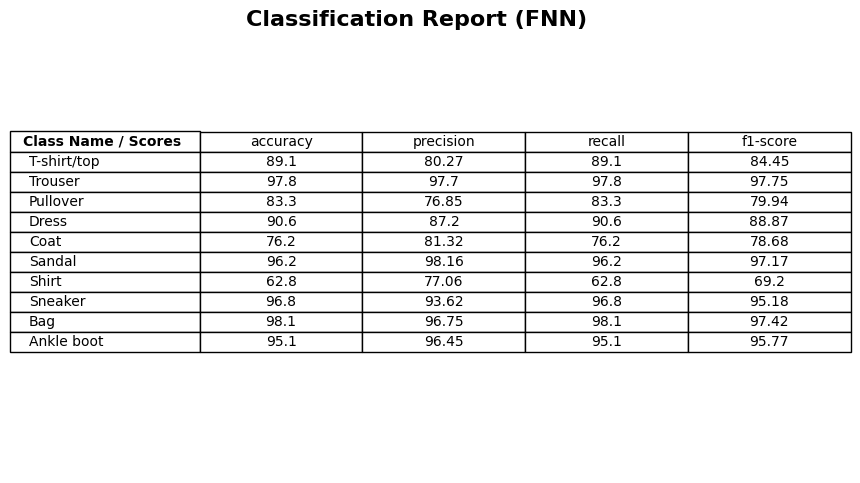

In [29]:

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(7, 6))  # Adjust the size as needed

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 cellLoc='center',
                 loc='center')

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add corner label
table.add_cell(0, -1, width=0.15, height=0.045)
table[0, -1].set_text_props(text='Class Name / Scores', weight='bold')

# Add a title to the plot
plt.title('Classification Report (FNN)', x=0.3, y=0.95, fontsize=16, fontweight='bold', ha='center')

# Save the table as an image
plt.savefig('classification_report_FNN.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()